Execution for house price estimation

In [49]:
# Import relevant files and libraries
import DataProcessor
import sys
import LRegression
import NLRegression
import performance_metrics
import Kmeans
import UserInterface

Define the parameters



In [50]:
# Allocate 80% of data to training
train_size = 0.8

# Identify features to be used
columnsToKeep = ['Price','Type','Bedroom','Bathroom','Car','Landsize','BuildingArea','Latitude','Longitude']
#columnsToKeep = ['Price', 'Bedroom', 'Bathroom']
#columnsToKeep = ['Price', 'Type', 'Landsize', 'BuildingArea']

# Path to dataset.
filepath = '../dataset/Melbourne_housing_FULL.csv'

# Identify prediction (ground truth)
prediction_column = 'Price'

Process raw data

In [51]:
# Create a DataProcessor object and load the data
dp_obj = DataProcessor.DataProcessor()
dp_obj.LoadData(filepath)

# Remove incomplete points, remove unused features and shuffle the data
dp_obj.keepSelectedColumns(columnsToKeep)
dp_obj.filterMelbourneData()

dp_obj.remove_outliers(columnsToKeep, plot=False)

# dp_obj.encodeCategoricalData(['Type'])
dp_obj.shuffleData()
dp_obj.reduceDataSize(2000) # remove this to train on the full dataset

# Split the data into training and testing
train_X, train_Y, test_X, test_Y = dp_obj.splitData(train_size, prediction_column)

# print(train_X.head())

# Remove dwelling type and additional landsize / building area data for some processing
clean_columns = ['Type', 'Landsize','BuildingArea']
train_X_clean = train_X.drop(columns=clean_columns,axis=1)
test_X_clean = test_X.drop(columns=clean_columns,axis=1)

Data Processor object created
Number of rows removed: 1935
Number of rows remaining: 7438
training size 1600
test size 400


K-Means Clustering

c:\Users\wbato\ai_project.github.io\code\Kmeans.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_column.replace(key, value, inplace=True)


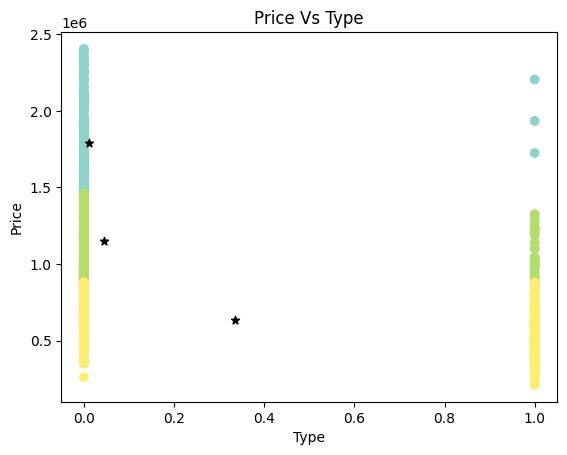

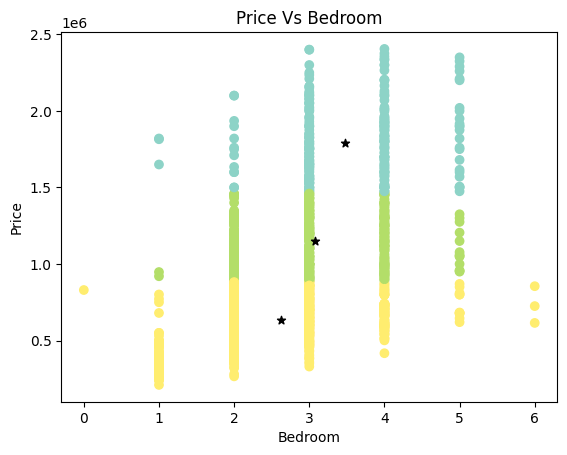

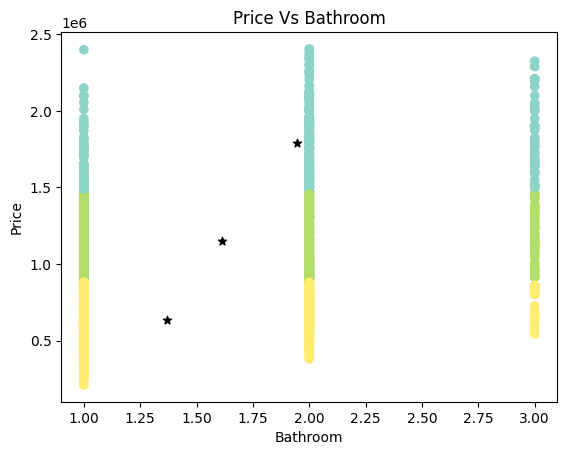

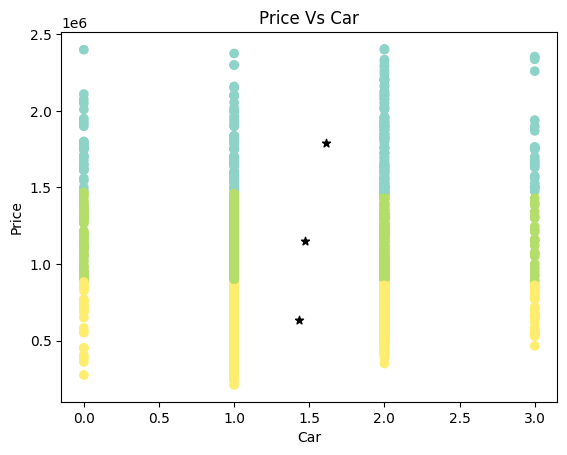

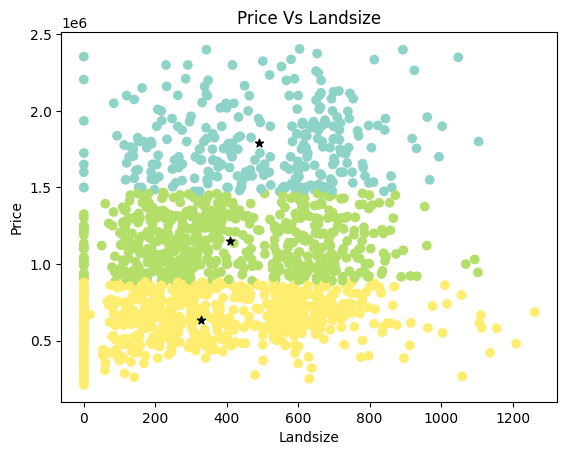

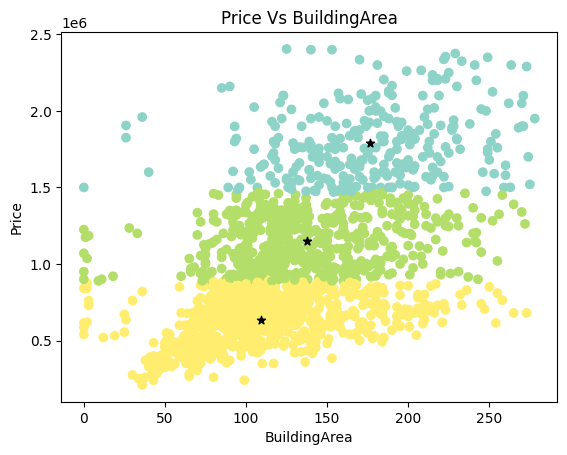

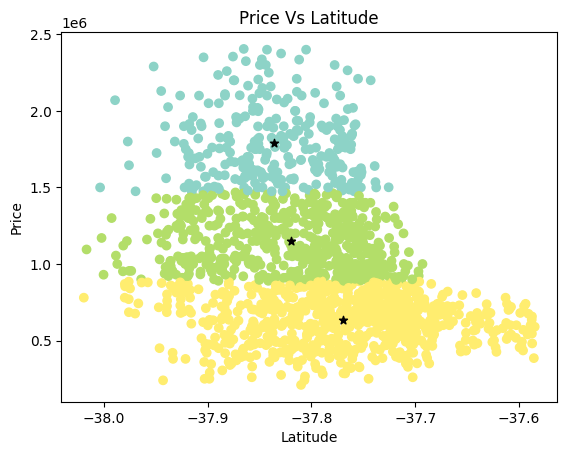

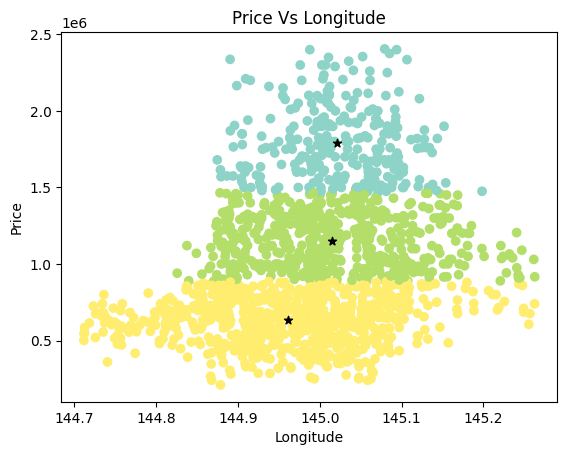

Index(['Type', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'Latitude', 'Longitude', 'Size', 'AssignmentType', 'AssignmentBedroom',
       'AssignmentBathroom', 'AssignmentCar', 'AssignmentLandsize',
       'AssignmentBuildingArea', 'AssignmentLatitude', 'AssignmentLongitude'],
      dtype='object')


In [52]:
# Ashton
k = 3
# prefs = ['Type','Bedroom','Bathroom','Car','Landsize','BuildingArea','Latitude','Longitude']
prefs = ['Type','Bedroom','Bathroom','Car','Landsize','BuildingArea','Latitude','Longitude']

all_points = []
all_centroids = []

for pref in prefs:
    kmeans = Kmeans.Kmeans(train_X, train_Y, k, pref)

    train_X, points, centroids = kmeans.cluster()

    all_points.append(points)
    all_centroids.append(centroids)

    kmeans.plotKmean(train_X, points, centroids, pref)

# kmeans = Kmeans.Kmeans(train_X, train_Y, k, prefs)

# train_X, points, centroids = kmeans.cluster()

# all_points.append(points)
# all_centroids.append(centroids)

# kmeans.plotKmean(train_X, points, centroids, prefs)

print(train_X.columns)


Linear Regression

In [ ]:
# TEMPORARY
# k = 5
# pref = 'Size'
# km = kmeans.Kmeans(train_X_clean,train_Y,k,pref)

# train_X, points, centroids = km.cluster()
# print(train_X['Assignment'].shape)

In [5]:
lr = LRegression.LRegression()
for i in range(k):
    features = train_X[train_X['Assignment'] == i]
    features = features.drop('Assignment',axis=1)
    targets = train_Y[train_X['Assignment'] == i]
    y_pred = lr.LinearRegression(features=features,target=targets)
    print(y_pred)

KeyError: 'Assignment'

In [6]:
lr = LRegression.LRegression()
assignments = train_X['Assignment']
# features = train_X.drop('Assignment',axis=1)
features = train_X
models = lr.LinearReg(assignments,features,train_Y)

AttributeError: 'LRegression' object has no attribute 'LinearReg'

In [7]:
# Train
lr = LRegression.LRegression()
y_pred = []
# for i in range(k):
#     y_pred.append(lr.LinReg(features=train_X,target=train_Y,assignment=i))
y_pred = lr.LinReg(features=train_X,target=train_Y,assignment=train_X['Assignment'])

LinAlgError: Singular matrix

In [ ]:
# Test


Non-Linear Regression (Gaussian Processing)

In [9]:
# Train

# ask to train or load a model
query = input("Do you want to train a new model? (y/n): ")
if query == 'y':
    # Ask user for features to train on
    featuresToTrain = ['Size','Latitude','Longitude']
    nlr = NLRegression.NLRegression(train_X, train_Y, test_X, test_Y, featuresToTrain)
    nlr.train()
    # ask to save
    query = input("Do you want to save the model? (y/n): ")
    if query == 'y':
        filepath_ = '../saved_models/nlr_model_R_2_' + str(nlr.evaluate()) + '.pkl'
        nlr.saveModel(filepath_)
else:
    featuresToTrain = ['Size','Latitude','Longitude']
    nlr = NLRegression.NLRegression(train_X, train_Y, test_X, test_Y, featuresToTrain)
    filename_ = input("Enter the filename of the model to load: ")
    nlr.loadModel(filename_)

# options: 'Type','Bedroom','Bathroom','Car','Size','Latitude','Longitude'


/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


R² Score: 0.6348336433964858


In [ ]:
# save the model


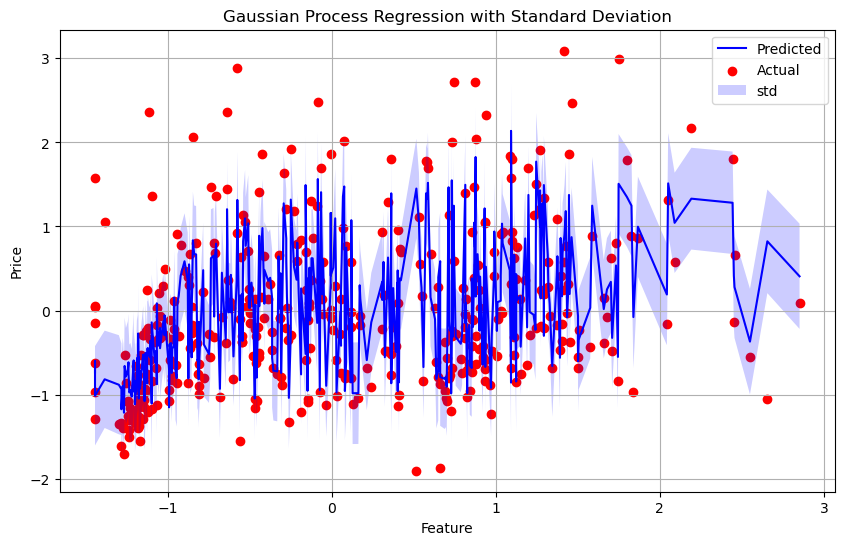

In [10]:
# plotting predictions vs expected
nlr.plot()

In [ ]:
# slow but more accurate test
nlr.cross_validate()

In [ ]:
# Select a sample row and keep it as a Series
sample_number = 300

sample = test_X[featuresToTrain].iloc[sample_number]
print("sample: ", sample.values)

# Predict using the model with the scaled data
pred, bounds = nlr.predictActual(sample)
print("prediction: ", pred[0])
# print("bounds:     ", bounds[0], bounds[1])
print("actual:     ", test_Y.iloc[sample_number])

Evaluation Metrics

Data Processor object created


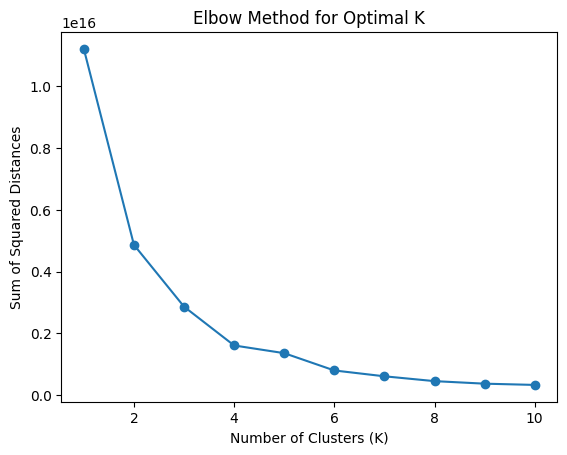

Optimal number of clusters: 1


In [55]:
from performance_metrics import ElbowMethod
from DataProcessor import DataProcessor
import pandas as pd
from sklearn.impute import SimpleImputer

# Identify features to be used (excluding 'Type')
columnsToKeep = ['Price', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Latitude', 'Longitude']

# Path to dataset
filepath = '../dataset/Melbourne_housing_FULL.csv'

# Step 1: Load and preprocess the data
data_processor = DataProcessor()
data = data_processor.LoadData(filepath)

# Drop columns that are not relevant or cannot be converted to numeric
data = data_processor.keepSelectedColumns(columnsToKeep)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Step 2: Use the ElbowMethod class with the preprocessed data
elbow_method = ElbowMethod(data)  # Initialize ElbowMethod
elbow_method.evaluate(max_clusters=10)
elbow_method.plot()
optimal_clusters = elbow_method.optimal_number_of_clusters()
print("Optimal number of clusters:", optimal_clusters)


Data Processor object created


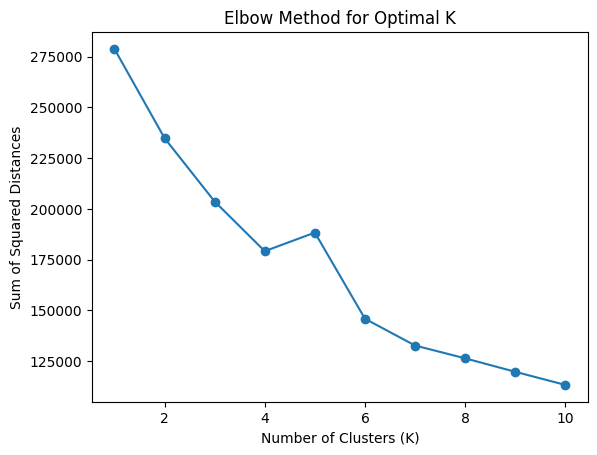

Optimal number of clusters: 4


In [61]:
from sklearn.preprocessing import StandardScaler

# Data Preprocessing
data_processor = DataProcessor()
data = data_processor.LoadData(filepath)
data = data_processor.keepSelectedColumns(columnsToKeep)
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Elbow Method for Optimal K
elbow_method = ElbowMethod(data_scaled)
elbow_method.evaluate(max_clusters=10)
elbow_method.plot()
optimal_clusters = elbow_method.optimal_number_of_clusters()
print("Optimal number of clusters:", optimal_clusters)
# print(train_X.columns)
# print(train_X)


User input for preference

In [58]:
from performance_metrics import calculate_silhouette_score
# Assuming kmeans.cluster() returns x_new, points, centroids
x_new, points, centroids = kmeans.cluster()
assignment = x_new['Assignment' + pref].values  # Extract the cluster assignments

silhouette_avg = calculate_silhouette_score(points, assignment)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5244951622939967


In [ ]:
# Calculate mean values if no user preference is provided
meanLand = dp_obj.getAverage('Landsize')
meanBuilding = dp_obj.getAverage('BuildingArea')

# Input user preferences
user_pref = UserInterface.UserInterface()
type, bedrooms, bathrooms, car, size, latitude, longitude = user_pref.Inputs(meanLand, meanBuilding)
print(type,bedrooms,bathrooms,car,size,latitude,longitude)

Final prediction

In [ ]:
# Return predicted value from best performing model
targets = [type,bedrooms,bathrooms,car,size,latitude,longitude]
pred = lr.predict(features=targets)